In [ ]:
#MLP (Manually)
import numpy as np

x=np.array([[1],[4],[3],[2]])
y=np.array([[1]])

input_size=len(x)
hidden_size=2
output_size=1
lr=0.01

w1=np.random.randn(hidden_size,input_size)
b1=np.zeros((hidden_size,1))

w2=np.random.randn(output_size,hidden_size)
b2=np.zeros((output_size,1))

def relu(z):
    return np.maximum(0,z)

def relu_deriv(z):
    return (z>0).astype(float)

#Frwd Propagation
for i in range(500):
    h1=np.dot(w1,x)+b1
    a1=relu(h1)

    h2=np.dot(w2,a1)+b2
    y_pred=h2

    loss=0.5*(y_pred-y)**2

    #Back Propagation
    dh2 = y_pred - y
    dw2 = dh2 @ a1.T
    db2 = dh2

    da1 = w2.T @ dh2
    dh1 = da1 * relu_deriv(h1)
    dw1 = dh1 @ x.T
    db1 = dh1


    w2=w2-lr*dw2
    w1=w1-lr*dw1

    b1 = b1 - lr * db1
    b2 = b2 - lr * db2


    if i % 100 == 0:
        print(f"Step {i}-Loss: {loss.item():.4f}")

Step 0-Loss: 0.5000
Step 100-Loss: 0.0670
Step 200-Loss: 0.0090
Step 300-Loss: 0.0012
Step 400-Loss: 0.0002


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
X,y = fetch_openml("mnist_784",version=1, return_X_y=True, as_frame=False)
X=X/255.0

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.7)

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(64,32),activation='relu', max_iter=100)

In [ ]:
mlp.fit(X_train, y_train)
print("Train %f"%mlp.score(X_train,y_train))
print("test %f"%mlp.score(X_test,y_test))

Train 1.000000
test 0.961082


In [ ]:
print("Train %f"%mlp.score(X_train,y_train))
print("test %f"%mlp.score(X_test,y_test))

Train 1.000000
test 0.961082


0.7057755102040816


Text(0.5, 0, 'Epochs')

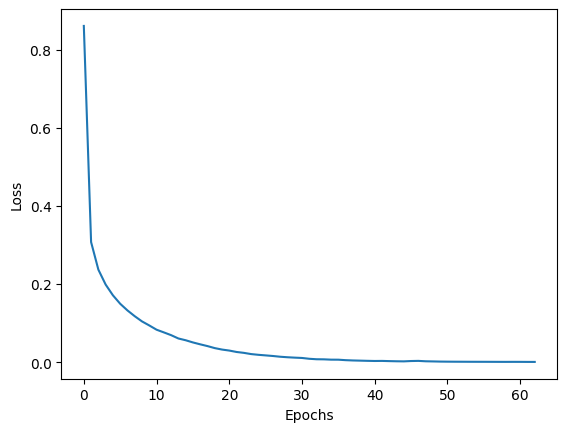

In [ ]:
y_pred=mlp.predict(X_test)
loss=mean_squared_error(y_pred,y_test)
print(loss)
plt.plot(mlp.loss_curve_)
plt.ylabel("Loss")
plt.xlabel("Epochs")